# Analysis of The Physical Activity Monitoring Dataset
## **Content**
### Section 1
1. Introduction.
2. Reading in the Dataset
3. Data Cleaning
### Section 2
1. Exploratory Data Analysis
2. Splitting the Data
3. Hypothesis Statement
4. Preprocessing
### Section 3
1. Modelling
2. Conclusion


## 1.1 Introduction
### 1.1.1 Market Background
Trivisio developed the Colibri Wireless unit, a cutting-edge Inertial Measurement Unit (IMU) meant to surpass market competitors. The Colibri Wireless unit is outfitted with three sensors that measure acceleration, angular rate, and magnetic field, as well as temperature and orientation sensors. This complete set of features establishes the Colibri Wireless as a market leader in the IMU market.

Competitors in the market include the Wireless InertiaCube3 by InterSense, MTw Awinda by Xsens, T40s by Vicon, and OptoTrak 3020 by Optotrak Certus. Trivisio wants to establish the Colibri Wireless unit as the superior choice among these alternatives.

Key Features of Colibri Wireless:
* Multi-Sensor Capability
* Temperature and Orientation Sensors
* User-Centric Design
* Heart-Rate Monitoring
* Extensive Activity Dataset

#### 1.1.2 Strategic Positioning
Trivisio seeks to take a major share of the IMU market by providing a great solution that excels in accuracy, functionality, and user experience. The Colibri Wireless unit demonstrates Trivisio's dedication to innovation and excellence in motion sensing technology.

### 1.1.3 Approach
The dataset utilised for this project is Physical Activity Monitoring, which is an Activity Monitoring dataset that comprises 12 core and 6 extra physical activities performed by 9 individuals, 8 men and 1 woman, utilising three inertial measurement units and a heart rate monitor. I would be cleaning this data, carry out an EDA, state a predictive hypothesis which I would be developing a model to test and give an actionable recommendation based on my analysis.

The goal of this project is to gather insights based on the findings of my investigation to establish how active an individual is based on physical activities that will be utilised for developing hardware and software.

### 1.1.4 The objectives of this report are:

1. To carry out thoroughly exploratory data analysis of the PAMD and appropriately handle missing or dirty data

2. To develop and test at least one model which uses multiple attributes to make predictions

3. To give actionable recommendations based on the analyses that I have conducted.


## 1.2 Reading in the Data

### 1.2.1 Importing Libraries
The following code snippet uses the NumPy and Pandas data manipulation tools, as well as Matplotlib for graphical visualisation. I begin by importing all of the libraries required for this study. 

In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

Now I then load the activity monitoring data for the several subjects into a dataframe for cleaning and preprocessing. 

In [76]:
# Loading the data
list_of_files = ['subject101.dat',
                 'subject102.dat',
                 'subject103.dat',
                 'subject104.dat',
                 'subject105.dat',
                 'subject106.dat',
                 'subject107.dat',
                 'subject108.dat',
                 'subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']
           
#store all columns in one list
columns = colNames + IMUhand + IMUchest + IMUankle  

len(columns)


54

### 1.2.2 Store the data in a Dataframe
I have read in the data so i go ahead to store the data in the dataframe which i named allData

In [77]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    df = pd.read_table(file, header=None, sep='\s+')
    df.columns = columns
    df['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(df, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9


### 1.2.3  Reading in Subject Information
Subject information is one of the data in the dataset given and I decided to read in the data and store in a dataframe which I named Info_Subject. 

The table below contained information on 1 female and 8 males. Males outnumbered females by a clear margin. As a result, the male samples that are examined are more accurate. Furthermore, they were $27.22±3.31 years$ years old. In addition, just one subject's dominant hand is left and the remaining 8 had the right hand as the dominant hand. As a result, during the following study, I will primarily examine data from the right hand for correctness.


In [78]:
info_subject = pd.DataFrame([
    ['Male', 27, 182, 83, 75, 193, 'right'],
    ['Female', 25, 169, 78, 74, 195, 'right'],
    ['Male', 31, 187, 92, 68, 189, 'right'],
    ['Male', 24, 194, 95, 58, 196, 'right'],
    ['Male', 26, 180, 73, 70, 194, 'right'],
    ['Male', 26, 183, 69, 60, 194, 'right'],
    ['Male', 23, 173, 86, 60, 197, 'right'],
    ['Male', 32, 179, 87, 66, 188, 'left'],
    ['Male', 31, 168, 65, 54, 189, 'right']], 
    index=range(101, 110),                       
    columns=['Sex', 'Age', 'Height (cm)', 'Weight (kg)', 'Resting HR (bpm)', 'Max HR (bpm)', 'Dominant hand'])

info_subject


,Sex,Age,Height (cm),Weight (kg),Resting HR (bpm),Max HR (bpm),Dominant hand
101,Male,27,182,83,75,193,right
102,Female,25,169,78,74,195,right
103,Male,31,187,92,68,189,right
104,Male,24,194,95,58,196,right
105,Male,26,180,73,70,194,right
106,Male,26,183,69,60,194,right
107,Male,23,173,86,60,197,right
108,Male,32,179,87,66,188,left
109,Male,31,168,65,54,189,right


## 1.3 Data Cleaning


### 1.3.1 Dropping Uneccessary Data and Features
Here I write a datacleaning function to drop all the features and data I felt won't be necessary for my analysis and this report. This includes all the orientation columns.

### 1.3.2 Identifying and Interpolating NaN Values
 It is clear that some data is missing, as the readme file mentions. There were some wireless disconnections during data collection, so the missing data must be accounted for and made up in such a way that our data analysis is not compromised. More specifically, each activity has 8 or fewer subjects who participated, and each activity has NaN values for diverse subjects and as a result, some data filling has been done. For the NaN values in our data, I utilised interpolate, which creates a new data point from a set of known data points.

In [79]:
def dataCleaning(dataCollection):
        # removed orientation columns 
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  
        #removal of any row of activity 0 as it is transient activity which it is not used                                     
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) 

        #removal of non numeric data in cells
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') 

        #removal of any remaining NaN value cells by constructing new data points in known set of data points
        dataCollection = dataCollection.interpolate() 
        
        return dataCollection

### 1.3.3 Cleaning and Resetting the Dataframe Index
In the code below, I call the data cleaning function i worte above and apply it to my dataframe, then I go on to reset the index and display the first 15 rows of the cleaned dataframe.

After dropping unneccessary features and columns in the dataset 
##### Initial Rows and Columns
* $2872533$ rows and $55$ columns

##### New Rows and Columns
* $1942872$ rows and $43$ columns we are going to be working with after cleaning.

In [80]:
dataCol = dataCleaning(dataCollection)
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


### 1.3.4 Calculating NaN Values in Heartrate column

From the table above I could see heartrate column still had the most NaN values, so I decided to confirm this by running the code below. The missing values of heart rate were the most significant according to the code below. The explanation could be that data acquisition problems result in missing data. For example, when the system's real-time need is high, the machine has no time to judge and make judgements, resulting in missing data values. However, heart rate data was critical for classification of activity types and other research. If a large number of other attribute values are dropped because one attribute value is missing, this is a huge waste of information. As a result, rather than discarding the data, I fill in the missing values.



In [81]:
all_cells = np.product(dataCollection['heartrate'].shape)
heartrate_missing = dataCollection['heartrate'].isnull().sum()


print('Missing values size of heart rate:',((1-(all_cells-heartrate_missing)/all_cells)),'%')
     

Missing values size of heart rate: 0.9086980027731623 %


In [82]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

### 1.3.5 Filling in the heartrate NaNs
After interpolation, there were still some NaN values in the heartrate column, this could be because they are at the beginning of the column. So I assign the NaN a value of 100

In [83]:
for i in range(0,4):
    dataCol["heartrate"].iloc[i] = 100

dataCol.isnull().sum()

/Users/ofure/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

### 1.3.6 Checking for Duplicates
I went ahead to check for duplicates after handling the NaN values and the below code shows our dataset had no duplicate columns or rows.

In [84]:
dataCol.duplicated().sum()

0

### 1.3.7 Getting the Dataframe Info
After cleaning, I ran .info() to allow me get a concise summary of my dataframe, giving details about its structure, data types, and memory usage, as this was important to carry on with my analysis.

In [85]:
#Getting data information after cleaning
dataCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   activityID        int64  
 2   heartrate         float64
 3   handTemperature   float64
 4   handAcc16_1       float64
 5   handAcc16_2       float64
 6   handAcc16_3       float64
 7   handAcc6_1        float64
 8   handAcc6_2        float64
 9   handAcc6_3        float64
 10  handGyro1         float64
 11  handGyro2         float64
 12  handGyro3         float64
 13  handMagne1        float64
 14  handMagne2        float64
 15  handMagne3        float64
 16  chestTemperature  float64
 17  chestAcc16_1      float64
 18  chestAcc16_2      float64
 19  chestAcc16_3      float64
 20  chestAcc6_1       float64
 21  chestAcc6_2       float64
 22  chestAcc6_3       float64
 23  chestGyro1        float64
 24  chestGyro2        float64
 25  chestGyro3        float64
 26  chestMagne1   


## 2.1 Exploratory Data Analysis (EDA)


### 2.1.1 Describing the Dataset
Running df.describe() gives me descriptive statistics to understand the count, mean, standard deviation etc for all the numerical columns in the dataset. I need to look at some insights from the pandas describe method because it can provide further information about how the data is being processed for my research.

The output below indicates that the average heart rate is around $107$. The maximum is $202$, which could indicate an outlier caused by a heartrate sensor malfunction or intense activities done at that time.

In [86]:
dataCol.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,9.378478e+00,-4.550154e-02,-2.174212e+00,9.960309e-03,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,4.566387e+00
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.067634e+00,7.190996e+00,3.475429e+00,1.126903e+00,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-6.114200e+01,-6.190640e+01,-6.231480e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.000000e+00
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,8.398307e+00,-2.073670e+00,-3.398540e+00,-2.086955e-01,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,2.000000e+00
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,9.551120e+00,-2.252230e-01,-1.991685e+00,4.606210e-03,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,5.000000e+00
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.028590e+01,1.921310e+00,-5.946650e-01,1.310400e-01,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,6.196930e+01,6.204900e+01,6.093570e+01,1.742040e+01,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,9.000000e+00


### 2.1.2 Checking the Subjects BMI

 "$ BMI = \frac{weight (kg)}{height (m)^2} $"

I decided to calculate the BMI of each subject, as this would help me ascertain that they were in good health conditions when the test was carried out. 
The code below shows I calculated their individual BMI's and attached it as a new cloumn to the Info_subject dataframe.

In [87]:
info_subject['bmi'] = info_subject['Weight (kg)'] / (info_subject['Height (cm)']/100)**2
info_subject

,Sex,Age,Height (cm),Weight (kg),Resting HR (bpm),Max HR (bpm),Dominant hand,bmi
101,Male,27,182,83,75,193,right,25.057360
102,Female,25,169,78,74,195,right,27.309968
103,Male,31,187,92,68,189,right,26.309017
104,Male,24,194,95,58,196,right,25.241790
105,Male,26,180,73,70,194,right,22.530864
106,Male,26,183,69,60,194,right,20.603780
107,Male,23,173,86,60,197,right,28.734672
108,Male,32,179,87,66,188,left,27.152711
109,Male,31,168,65,54,189,right,23.030045


#### Getting the average BMI

BMI measurements chart:

* =< 18.5 = Underweight
* => 25 = Normal weight
* => 28.9 = Overweight
* =< 29 = Obese

After calculating the individual BMI of each subject, I checked for the average BMI and it returned $25.1$ as their average BMI. This means the subjects were in good health and normal in their weight. Although the stats showed that subject 107 is overweight, by having a BMI of $28.7$ but this can be due to muscle weight and can be overlooked.

I can therefore conclude that no subjects were in very poor physical health when they were tested.

In [88]:
# BMI stats
print(f"Mean BMI: {np.mean(info_subject['bmi'])}")
display(info_subject[max(info_subject['bmi']) == info_subject['bmi']])
display(info_subject[min(info_subject['bmi']) == info_subject['bmi']])

Mean BMI: 25.107800803931557


,Sex,Age,Height (cm),Weight (kg),Resting HR (bpm),Max HR (bpm),Dominant hand,bmi
107,Male,23,173,86,60,197,right,28.734672


,Sex,Age,Height (cm),Weight (kg),Resting HR (bpm),Max HR (bpm),Dominant hand,bmi
106,Male,26,183,69,60,194,right,20.60378


### 2.1.3 Heartrate Analysis
In this section of the analysis, our primary focus centers on the heart rate, considered the most accurate metric for monitoring subjects during various activities, as highlighted in the dataset's readme file. Examining the distribution of recorded heart rates across different subjects, we observe that the mean heart rate across the dataset is $107.4$. Additionally, the heart rate varies, with a minimum of $57$ and a maximum of $202$.

To get deeper insights into the distribution, I delve into quartile analysis. I use a box plot, to visualize the quartiles, identify potential outliers, and depict the mean heart rate. This graphical representation will enhance my understanding of the dataset's heart rate distribution, shedding light on quartile groupings and highlighting any notable outliers.


#### Heartrate Box Plot
The box plot shows that the outliers have heart rates ranging from $180$ to $202$. Our highest quartile group of the four begins at $124$, the end of the Inter-quartile range, and ends at 180, making it our largest group when the size of the box plot is compared to the other quartiles. That is, the majority of subjects on the activities performed had heart rates ranging from $124$ to $180$. Our third quartile group begins at the mean value of $107.4$ (the horizontal line in our box) and ends at the end of the Inter-quartile range of $124$.

The second quartile group begins at the beginning of the inter-quartile range, $86$, and ends at the mean value, $124$. Our first quartile group runs from the lowest data point, $57$, to the beginning of the inter-quartile range, $86$. Our box plot also reveals that while most individuals completed some tasks in statistically similar ways, they did not do so in all activities, which explains the large upper quartile group.

/Users/ofure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


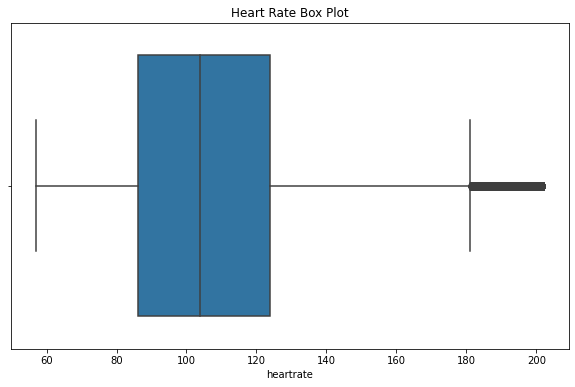

In [89]:

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(dataCol['heartrate'])
plt.title("Heart Rate Box Plot")
plt.show()

#### Heartrate Distribution Plot
The skew in the distribution plot is positive. Positive skew occurs when the right tail of a distribution is longer; the distribution's mass is concentrated on the left side of the picture. Despite the fact that the curve itself appears to be skewed or leaning to the left, the distribution is said to be right-skewed, right-tailed, or skewed to the right; right instead refers to the right tail being drawn out and, often, this means being skewed to the right of a typical centre of the data. A right-skewed distribution is typically represented by a left-leaning curve. 

This distribution's mean would be on the right side of the graph and would be greater than the median or mode. This shape implies that there are a lot of data points that are greater than the mode, possibly outliers. Mean > Median > Mode, for example. A higher percentage of the heartrate appears to be grouped between $70$ and $140$.

/Users/ofure/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


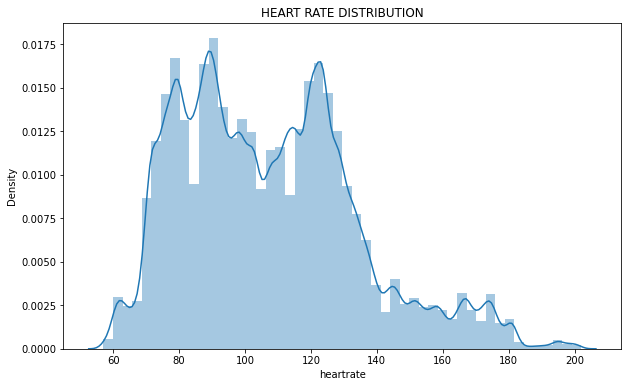

In [90]:
# Visualize the distribution of heartrate

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(dataCol['heartrate'])
plt.title("HEART RATE DISTRIBUTION")
plt.show()

#### Visualising Strenuous Activity (Bar Chart)
When performing strenuous or demanding tasks, the heart rate is supposed to be greater. I use a barchart to visualise the heart rate for each activity. The bar chart shows that the most taxing exercises are rope jumping and running, with heart rates considerably above 150bpm, while climbing stairs and cycling are considered moderate. Sitting and lying are the least taxing, with heart rates ranging between 70 and 80 beats per minute.

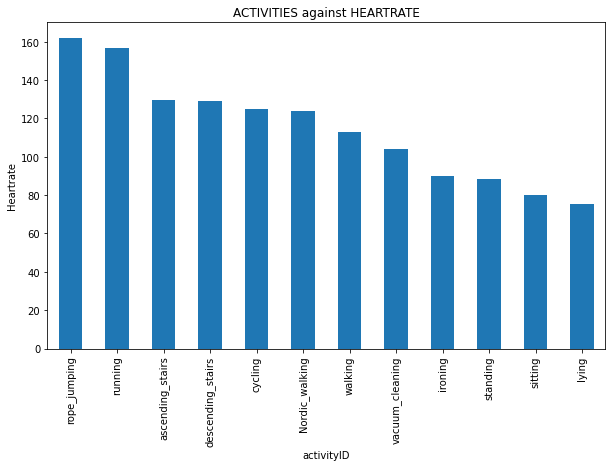

In [91]:
# Barchart of activities and Heartrate

activity_distribution = dataCol['heartrate'].groupby(by=dataCol['activityID']).mean().sort_values(ascending=False)
activity_distribution.index = activity_distribution.index.map(activityIDdict)
fig, ax = plt.subplots(figsize=(10,6))
activity_distribution.plot(kind = 'bar')
plt.title('ACTIVITIES against HEARTRATE')
plt.ylabel('Heartrate')
plt.plot()
plt.show()

### 2.1.4 Subjects Analysis
In this step, I examined the subjects based on the timestamps of the activities they carried out. First, I defined a plot function to make it easier to create plots.

In [92]:
# Function to create plots

def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b], rotation = (90))
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()

#### Subject against Timestamp
According to the bar graph below, subject 9 had the lowest recorded performance. This could have been caused by a machine malfunction. The data from this subject should be removed because it may alter the analysis results. Subject 5, on the other hand, has the greatest reported activity.

/var/folders/qd/ldt54y4n0clbpgfms8105lk80000gn/T/ipykernel_99515/2547426776.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b], rotation = (90))
No handles with labels found to put in legend.


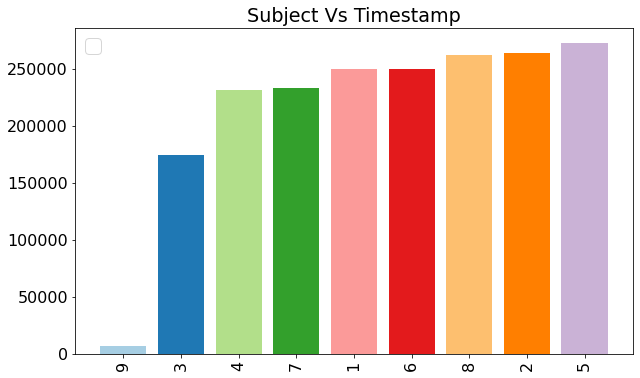

In [93]:
#Get required data and plot with defined function

sample = dataCol.groupby(['subject_id']).count().reset_index()
sample_to_subject = pd.DataFrame()
sample_to_subject['id'] = sample['subject_id']
sample_to_subject['sample'] = sample['timestamp']
sample_to_subject = sample_to_subject.sort_values(by=['sample'])
pd_fast_plot(sample_to_subject,'sample','id','Subject Vs Timestamp')

#### Activities against Timestamp
I visualised the activities performed by the subjects against different timestamps below to identify what activities the subjects carried out the most. Walking had the highest timestamp, which is understandable given that most human activities include walking. Rope jumping had the lowest timestamp and so was the least often done exercise by the subjects.

/var/folders/qd/ldt54y4n0clbpgfms8105lk80000gn/T/ipykernel_99515/2547426776.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b], rotation = (90))
No handles with labels found to put in legend.


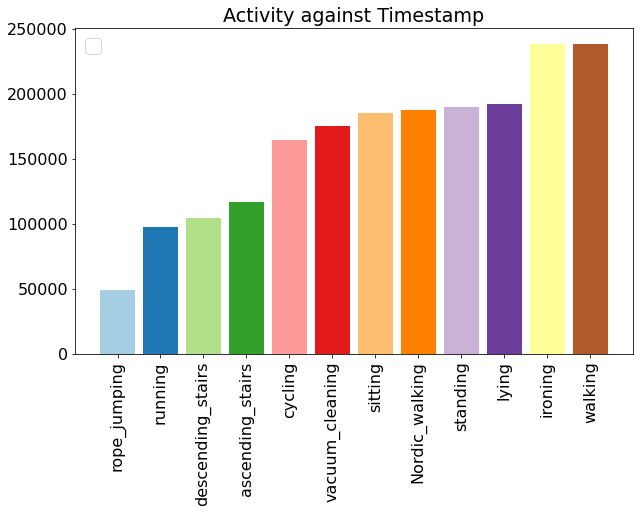

In [94]:
#Get required data and plot with defined function

sample = dataCol.groupby(['activityID']).count().reset_index()
sample_to_subject = pd.DataFrame()
sample_to_subject['activity'] = [activityIDdict[x] for x in sample['activityID']]
sample_to_subject['sample'] = sample['timestamp']
sample_to_subject = sample_to_subject.sort_values(by=['sample'])
pd_fast_plot(sample_to_subject,'sample','activity','Activity against Timestamp')


### 2.1.5 Temperature Analysis

#### Average Temperature against Subjects
In this section, I examined the average temperature readings taken from the subjects' hands, chests, and ankles. Overall, the chest had the highest temperature, while the hand had the lowest. As we approach subject 9, we can detect a reduction in temperature across all three sensors. This is explained by the previous plot, Subject Vs Timestamp, which revealed that subject 9 had the least quantity of recorded activity.  Subject 9 is projected to have the lowest recorded temperature and so deviates from the regular pattern, as seen in the line plot below. Subject 5 had the greatest temperature recorded from the hand and chest, whereas subject 6 has the highest temperature recorded from the ankle.

/var/folders/qd/ldt54y4n0clbpgfms8105lk80000gn/T/ipykernel_99515/400241558.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


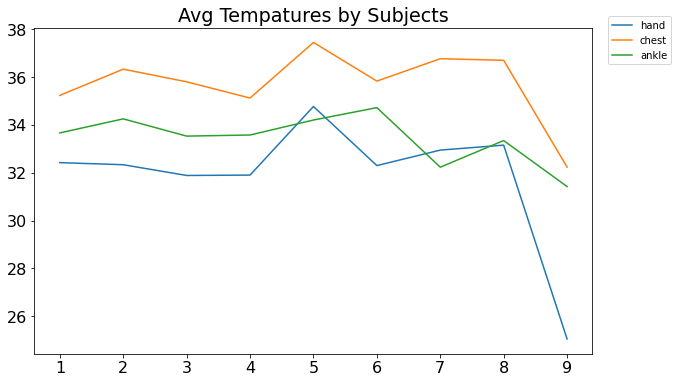

In [95]:
#Get required data and plot

result_id = dataCol.groupby(['subject_id']).mean().reset_index()
sample_temp = pd.DataFrame()
sample_temp['hand'] = result_id['handTemperature']
sample_temp['chest'] = result_id['chestTemperature']
sample_temp['ankle'] = result_id['ankleTemperature']

ax = sample_temp.plot(kind='line', figsize=(10,6), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 10, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(sample_temp)))


#### Average Temperature against Activities
Below I examined the temperature data as well as the actions carried out. All three observed temperature trends in running and rope jumping show a decrease. This is not surprising given that rope jumping and running had the fewest Timestamps, as shown in the plot titled Activity against Timestamp, showing that these activities had few data points captured. It may be because it was not an activity that the subjects performed frequently or machines malfunctioned when the participants were performing the activities.

/var/folders/qd/ldt54y4n0clbpgfms8105lk80000gn/T/ipykernel_99515/2264438695.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(sample_temperature['activity'], rotation =90)


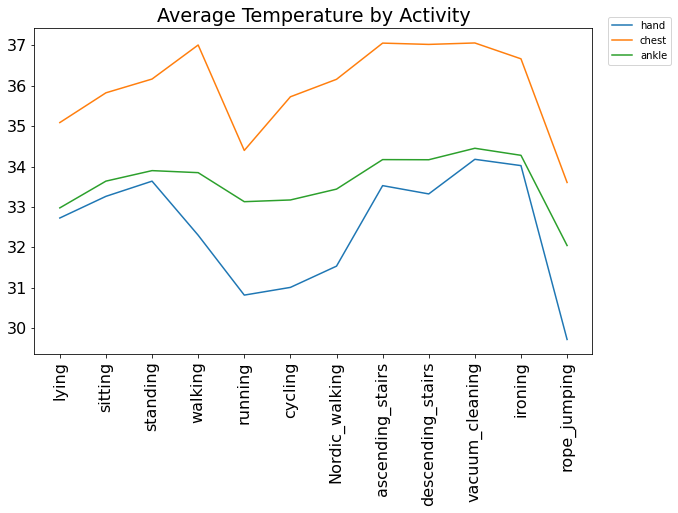

In [96]:
#Get required data and plot

result_act = dataCol.groupby(['activityID']).mean().reset_index()
sample_temperature = pd.DataFrame()
sample_temperature['activity'] = [activityIDdict[x] for x in result_act['activityID']]
sample_temperature['hand'] = result_act['handTemperature']
sample_temperature['chest'] = result_act['chestTemperature']
sample_temperature['ankle'] = result_act['ankleTemperature']

ax = sample_temperature.plot(kind='line', figsize=(10,6), title='Average Temperature by Activity')
a = ax.set_xticklabels(sample_temperature['activity'], rotation =90)
b = ax.legend(fontsize = 10, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(sample_temperature)))


### 2.1.6 Corrrelation
Correlation is defined as any statistical relationship that exists between two random variables. Correlations are useful because they can reveal a potentially exploitable predictive link. To compute pairwise correlation of columns, I use the pandas corrlation function (method = pearson). As a result, the table below appears to be unintuitive at first glance. I make a heat map using Seaborn's heatmap plot to see whether there are any links between our data and to look for abnormalities.

To check further on our data to see any anormalities, we have to plot a heat map which will show whether our data has correlations inbetween it. All columns will be used in order to understand the extend of problems, if there are any.

In [97]:
from pandas.plotting import scatter_matrix
df_corr = dataCol.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)
df_corr.head(10)

,timestamp,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
timestamp,1.000000,0.781720,-0.493674,-0.321940,0.039321,-0.215706,-0.332616,0.036865,-0.226055,0.011050,...,0.343229,0.218812,0.003066,0.001594,-0.045435,-0.001125,-0.308442,-0.234251,-0.041953,-0.022949
activityID,0.143712,0.265348,0.159352,-0.129905,0.038609,-0.116724,-0.129179,0.042104,-0.118394,0.019513,...,0.144746,0.103893,0.099199,-0.004876,0.012900,0.001905,-0.199631,-0.069626,0.209897,-0.001891
heartrate,0.781720,1.000000,-0.395932,-0.298458,0.065728,-0.268278,-0.307739,0.063252,-0.277938,0.012257,...,0.297939,0.211036,-0.009076,0.001228,-0.028440,0.001550,-0.325755,-0.247339,-0.056973,-0.127993
handTemperature,-0.493674,-0.395932,1.000000,0.059130,-0.053288,0.077812,0.073200,-0.048332,0.094127,-0.025622,...,-0.061476,-0.053106,-0.042125,-0.000417,0.033085,0.001882,0.092230,0.112293,0.154059,0.154094
handAcc16_1,-0.321940,-0.298458,0.059130,1.000000,-0.085483,0.257433,0.978695,-0.080322,0.261275,0.020572,...,-0.320398,-0.101164,-0.013885,0.038499,-0.072116,0.093352,0.084533,0.206595,-0.042602,-0.030536
handAcc16_2,0.039321,0.065728,-0.053288,-0.085483,1.000000,-0.067639,-0.070139,0.945219,-0.070711,0.181804,...,0.060863,0.127373,0.007775,-0.004623,-0.031042,-0.037152,-0.049024,-0.096015,0.041010,-0.281382
handAcc16_3,-0.215706,-0.268278,0.077812,0.257433,-0.067639,1.000000,0.254849,-0.067663,0.964548,-0.028435,...,-0.164375,-0.075457,0.023768,0.012820,-0.011710,0.023692,0.060863,0.108253,-0.011762,-0.002032
handAcc6_1,-0.332616,-0.307739,0.073200,0.978695,-0.070139,0.254849,1.000000,-0.075857,0.258160,0.026733,...,-0.314685,-0.100935,-0.013800,0.039194,-0.070733,0.082080,0.085498,0.211722,-0.039436,-0.028407
handAcc6_2,0.036865,0.063252,-0.048332,-0.080322,0.945219,-0.067663,-0.075857,1.000000,-0.057245,0.127434,...,0.057046,0.130811,0.009622,-0.002519,-0.032122,-0.013802,-0.052534,-0.099627,0.043655,-0.299075
handAcc6_3,-0.226055,-0.277938,0.094127,0.261275,-0.070711,0.964548,0.258160,-0.057245,1.000000,-0.018062,...,-0.170112,-0.075637,0.021927,0.012257,-0.011419,0.025473,0.062323,0.112929,-0.009647,0.003984


#### Heat Map
To check further on our data to see any anormalities, we have to plot a heat map which will show whether our data has correlations inbetween it. All columns will be used in order to understand the extend of problems, if there are any.

##### Observations from the heatmap below
* Our heatmap depicts the degree of statistical similarity between our various columns. We can plainly see that the gyroscopes do not correspond with any of our other data and appear to be unnecessary in this scenario.
* On the other hand, we are able to see the correlation between ankle accelerometers and theartrate. On all three cases of ankle accelerometers, the two are significantly associated this could be because the active activities involves motion.
* Furthermore, the chest magnetometers appear to be connected with heart rate, which is extremely natural given their proximity on the body.

/var/folders/qd/ldt54y4n0clbpgfms8105lk80000gn/T/ipykernel_99515/2483066709.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


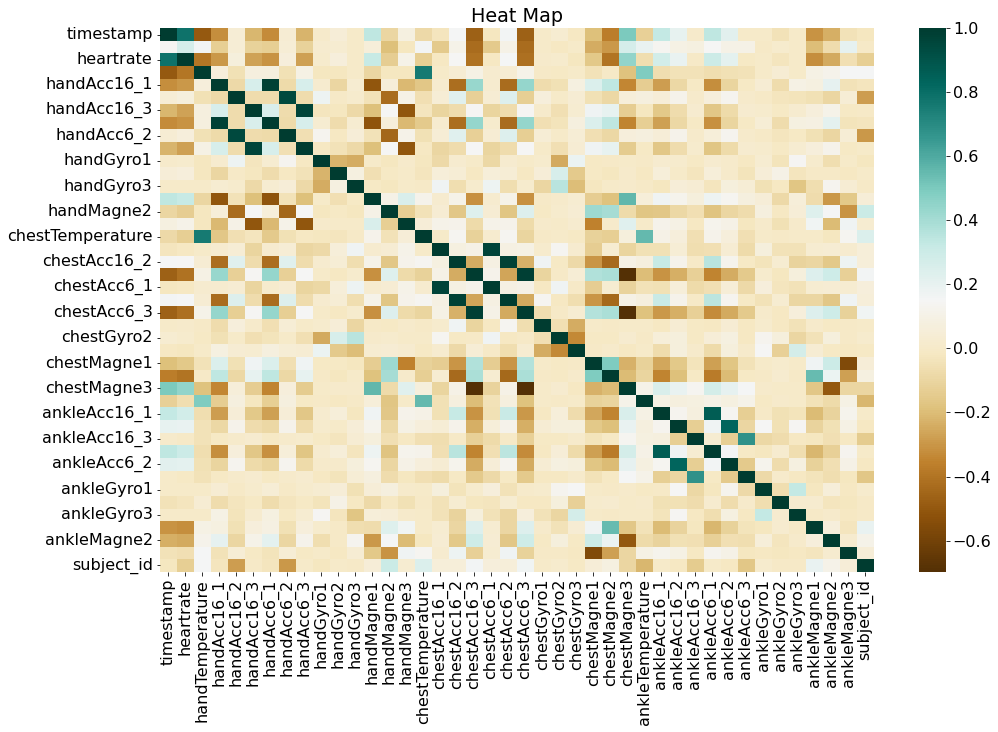

In [98]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.title("Heat Map")
plt.show()

## 2.2 Splitting the Data

We should first see if the classes are balanced, Before splitting our data which indicates that stratification is unnecessary for our split. If the weights of the classes are unbalanced, we should stratify while splitting the data. Stratified sampling is the process of collecting samples from all classes and distributing them to the subsets created for train and test sets. It aids in obtaining better outcomes when the weight distribution of the classes is not typical. A normal distribution would imply that the weights of each class are similar to the weights of all other classes.


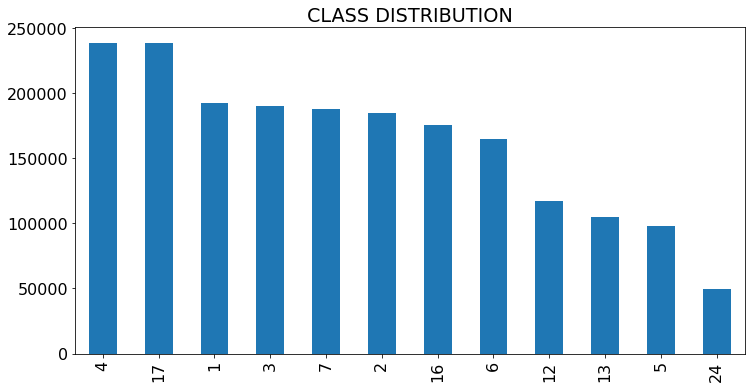

In [99]:
dataCol['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.title("CLASS DISTRIBUTION")
plt.show()

Our classes are mostly balanced, as shown by the plot above. As a result, we divide the data into train and test sets. The industry standard split is 80% for train set and 20% for test set, which is the split fraction that I would be using as This is done to prevent data leakage, which could lead to the development of a biassed model that does not function well with unknown data.


In [100]:
train_df = dataCol.sample(frac=0.8, random_state=1)
test_df = dataCol.drop(train_df.index)

## 2.3 Hypothesis Statement

The most active activities seems to be:
* Running 
* Rope jumping 
* Ascending stairs 
* Descending stairs 
* Cycling 
* Nordic walking 
* Walking 
* Vaccuum cleaning 
as seen from bar charts plotted above. Therefore our hypothesis testing will be based on these activities and how their heart rate data correlates with the rest of the activities' heart rates. This will be done by getting the mean heart rate of the activities and them comparing it to the mean heart rate of all activities.

#### 2.3.1 Hypothesis:

From the correlation map. we can see that there is a positive correlation between Heart rate and the activities performed. This means:

*  __"The type and intensity of physical activity (activityID) can be predicted using features such as heart rate, acceleration,and magnetic field measurements from the Colibri Wireless IMU."__


## 2.4 Preprocessing
Here I would classify my train and test data with the activityID into active and passive class. Then I create a new column and name it activity class, this columns classifies the activities in my dataframe into 2 which is the active and passive activities as I have listed below. 

Active activities are assigned the binary digit 1 and passive are assigned the binary digit 0. I do this for both the train and test data.

#### Active
* Running 
* Rope jumping 
* Ascending stairs 
* Descending stairs 
* Cycling 
* Nordic walking 
* Walking 
* Vaccuum cleaning appears to be the most active activities, as seen by the bar chart created earlier.

#### Passive
* Lying
* Sitting 
* Standing 
* Ironing appears to be the less active activities, as seen by the bar chart created earlier.


#### 2.4.1 Classifying Train_Data Activities

In [101]:
def classify_Activity(activityID):
    # Define a set of activities considered 'active'
    active_activities = {4, 5, 6, 7, 12, 13, 16, 24}
    
    # Check if the activity is in the set of 'active' activities
    if activityID in active_activities:
        return 1  # 'Active' class
    else:
        return 0  # 'Sedentary' class

# Assuming you have a DataFrame 'df' with the 'activityID' column
train_df['Active_class'] = train_df['activityID'].apply(classify_Activity)
train_df.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id,Active_class
312921,767.77,3,90.000000,34.1875,-8.529810,4.712060,0.358276,-8.254460,4.955160,0.791698,...,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.87960,36.806500,2,0
141735,1926.37,12,167.909091,33.6875,-11.231400,2.967660,2.325040,-10.353600,2.978210,2.293150,...,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.7218,33.83850,-6.571620,1,1
1191085,3749.31,24,181.000000,33.8125,-1.779870,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-4.006830,2.162320,1.877290,-0.176273,-0.654045,-44.6465,-12.21680,0.272571,5,1
1206914,255.84,1,62.000000,33.4375,4.891770,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,-9.411680,-2.836260,-0.008012,0.002114,0.017758,-17.3221,26.44510,-4.782110,6,0
1710520,491.73,2,79.000000,34.3125,-1.964940,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,2.903000,-2.153400,0.010209,0.011341,0.028921,-19.4371,15.82690,26.000300,8,0
935798,271.83,1,79.000000,34.8750,0.786267,7.572410,5.914890,1.066890,7.505720,6.303460,...,-8.959530,-4.108090,0.045977,-0.013732,0.009086,-14.1767,27.95860,-5.907460,5,0
582853,956.64,3,81.636364,32.5625,-8.701960,3.174740,2.246770,-8.588560,3.191980,2.275780,...,0.091557,-0.800941,0.036775,0.212926,-0.095157,-6.5894,-3.11336,22.867100,3,0
361462,1390.52,16,104.000000,34.5000,-13.059900,3.072090,-0.319846,-12.222600,3.668950,-0.228277,...,0.887316,6.811180,-0.159734,0.220180,-0.075913,-15.0970,-1.86522,26.292000,2,1
84258,976.79,17,97.000000,33.3125,5.867270,4.818160,-0.581048,6.224430,4.275150,-0.928009,...,-0.330093,0.729677,-0.073049,-0.215370,-0.018326,-56.8118,-15.37650,41.466300,1,0
89152,1025.73,17,99.000000,33.3125,-4.958250,2.286410,8.001970,-4.983240,3.171410,8.116130,...,-1.724940,-1.943190,0.061526,0.021957,-0.018897,-53.1066,-10.44880,51.143300,1,0


#### 2.4.2 Classifying Test_Data Activities

In [102]:
def classify_Activity(activityID):
    # set of 'active' activities 
    active_activities = {4, 5, 6, 7, 12, 13, 16, 24}
    
    # Checking if the activity is in the set of 'active' activities
    if activityID in active_activities:
        return 1  
    else:
        return 0 
        
test_df['Active_class'] = test_df['activityID'].apply(classify_Activity)
test_df.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id,Active_class
22,37.88,1,100.000000,30.375,2.16379,8.28577,6.27951,2.18617,7.83003,6.45261,...,-1.79777,0.311422,0.004155,0.010500,0.007628,-60.6611,-36.7690,-58.3723,1,0
30,37.96,1,100.000000,30.375,2.25765,7.59830,5.85987,2.16453,7.48242,6.01547,...,-1.81300,0.220502,0.023341,-0.001635,0.001263,-61.2299,-36.3045,-58.6102,1,0
40,38.06,1,100.272727,30.375,2.55757,7.06515,5.90465,2.61486,7.16212,6.12142,...,-1.75239,0.311196,-0.036652,0.014985,-0.012131,-60.8694,-37.9735,-58.5072,1,0
41,38.07,1,100.363636,30.375,2.75107,6.95122,6.06188,2.68932,7.02569,6.15184,...,-1.70691,0.386565,0.027258,-0.010887,-0.013781,-61.2226,-36.9634,-58.8649,1,0
43,38.09,1,100.545455,30.375,2.44234,6.61109,5.94294,2.59396,6.66372,5.92622,...,-1.72214,0.311099,0.020192,-0.023808,0.042009,-61.1096,-36.7532,-58.3684,1,0
54,38.20,1,101.000000,30.375,2.27665,7.07285,6.51621,2.25165,7.08914,6.01624,...,-1.78269,0.265729,0.027545,0.021204,0.021969,-61.5491,-36.7524,-57.2508,1,0
58,38.24,1,101.000000,30.375,2.55248,7.66983,5.63312,2.40540,7.43539,6.03043,...,-1.73727,0.311227,-0.008612,0.010948,0.006811,-60.7804,-36.3219,-58.4903,1,0
72,38.38,1,101.000000,30.375,2.65804,6.42698,6.75503,2.75984,6.37586,6.22870,...,-1.76753,0.296190,-0.019702,-0.016250,0.009678,-61.1198,-36.3051,-58.8587,1,0
76,38.42,1,101.000000,30.375,1.77559,7.51033,8.31614,1.91805,6.54984,8.13187,...,-1.81289,0.311550,0.015676,0.021782,0.035335,-61.2193,-36.6456,-57.8713,1,0
78,38.44,1,101.000000,30.375,2.18428,9.17175,7.77783,1.89592,8.75544,8.67069,...,-1.76763,0.220516,-0.007117,0.005125,-0.000329,-60.5506,-36.6626,-58.3720,1,0


## 3.1  Modelling

Some variables must be eliminated which would reduce the precision of our modelling. The variables to be removed are timestamp and subject_id since they are numeric numbers that our modelling method would employ in its calculations, but because their values have no meaning, the modelling method used would have noise and accuracy estimates would be inaccurate.

Here I identify my dependent and Independent variables
* Independent Variable : activityID
* Dependent Variable : heartrate


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### 3.1.1  Dropping Unnecessary Variables

In [104]:

df_train = train_df.drop(['timestamp', 'subject_id'], axis=1)
df_test = test_df.drop(['timestamp', 'subject_id'], axis=1)
df_train.head(10)

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,Active_class
312921,3,90.000000,34.1875,-8.529810,4.712060,0.358276,-8.254460,4.955160,0.791698,-0.015127,...,9.716540,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.87960,36.806500,0
141735,12,167.909091,33.6875,-11.231400,2.967660,2.325040,-10.353600,2.978210,2.293150,-0.626024,...,11.137500,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.7218,33.83850,-6.571620,1
1191085,24,181.000000,33.8125,-1.779870,3.716760,-7.388680,-0.572605,3.958700,-4.197230,-3.711030,...,-4.136650,-4.006830,2.162320,1.877290,-0.176273,-0.654045,-44.6465,-12.21680,0.272571,1
1206914,1,62.000000,33.4375,4.891770,-0.216854,8.273420,5.134350,-0.344501,8.596710,0.040396,...,-0.117976,-9.411680,-2.836260,-0.008012,0.002114,0.017758,-17.3221,26.44510,-4.782110,0
1710520,2,79.000000,34.3125,-1.964940,-9.487270,0.889387,-1.802600,-9.468570,1.058310,-0.017383,...,9.187270,2.903000,-2.153400,0.010209,0.011341,0.028921,-19.4371,15.82690,26.000300,0
935798,1,79.000000,34.8750,0.786267,7.572410,5.914890,1.066890,7.505720,6.303460,0.004111,...,-0.303400,-8.959530,-4.108090,0.045977,-0.013732,0.009086,-14.1767,27.95860,-5.907460,0
582853,3,81.636364,32.5625,-8.701960,3.174740,2.246770,-8.588560,3.191980,2.275780,0.100718,...,9.868080,0.091557,-0.800941,0.036775,0.212926,-0.095157,-6.5894,-3.11336,22.867100,0
361462,16,104.000000,34.5000,-13.059900,3.072090,-0.319846,-12.222600,3.668950,-0.228277,-2.315990,...,9.554430,0.887316,6.811180,-0.159734,0.220180,-0.075913,-15.0970,-1.86522,26.292000,1
84258,17,97.000000,33.3125,5.867270,4.818160,-0.581048,6.224430,4.275150,-0.928009,-0.293515,...,9.754140,-0.330093,0.729677,-0.073049,-0.215370,-0.018326,-56.8118,-15.37650,41.466300,0
89152,17,99.000000,33.3125,-4.958250,2.286410,8.001970,-4.983240,3.171410,8.116130,-0.983097,...,9.457200,-1.724940,-1.943190,0.061526,0.021957,-0.018897,-53.1066,-10.44880,51.143300,0


### 3.1.2 Scaling
Given our data contains many outliers, scaling using the data's mean and variance is unlikely to function successfully. RobustScaler is used as a drop-in replacement for standard scaler or minmax scaler in this scenario. It employs more robust estimates for your data's centre and range. The code below shows how I have scaled both test and train data

In [105]:
#apply scaling to all columns except subject and activity

scaler = RobustScaler()
df_scaled = df_train
df_test_scaled = df_test

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_test_scaled.iloc[:,1:41] = scaler.fit_transform(df_test_scaled.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,Active_class
312921,3,-0.368421,0.447368,-0.384512,0.220069,-0.572507,-0.361436,0.256971,-0.530520,-0.012729,...,0.088339,-0.322152,0.351800,0.220183,0.001165,-0.139354,0.641700,-0.582432,0.658114,0
141735,12,1.681818,0.236842,-0.721708,-0.103407,-0.206281,-0.625117,-0.108947,-0.253147,-0.868631,...,0.842160,-0.269519,-0.185601,-0.829881,3.024896,-0.265261,-0.744416,1.091512,-0.924482,1
1191085,24,2.026316,0.289474,0.457975,0.035504,-2.015047,0.603512,0.072534,-1.452154,-5.190897,...,-7.260794,-0.946788,1.482238,5.524513,-0.773631,-1.222988,-0.447203,-0.428537,-0.674781,1
1206914,1,-1.105263,0.131579,1.290689,-0.693932,0.901352,1.320385,-0.723956,0.911347,0.065061,...,-5.128883,-2.300004,-0.300736,-0.037313,0.027350,0.037709,0.700615,0.847494,-0.859194,0
1710520,2,-0.657895,0.500000,0.434876,-2.413007,-0.473610,0.449008,-2.412753,-0.481267,-0.015890,...,-0.192439,0.783229,-0.057162,0.016440,0.068780,0.058657,0.611770,0.497042,0.263863,0


### 3.1.3 Seperating Dependent and Non Dependent Features
The goal of this research is to create a model that can predict the various activities that the individuals undertake using data from sensor readings and other existing variables in the dataset. The predicted feature, activityID, is thereby separated from the other features in both the train and test data.

In [106]:
# Train dataset

X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset

X_test = df_test_scaled.drop('activityID', axis=1).values
y_test = df_test_scaled['activityID'].values
y_train

array([ 3, 12, 24, ..., 17, 16,  3])

### 3.1.4 Dimensionality reduction using Principal Component Analysis(PCA)
Dimensionality reduction, also known as dimension reduction, is the process of transforming data from a high-dimensional space to a low-dimensional space in such a way that the low-dimensional representation retains certain relevant aspects of the original data, ideally close to its inherent dimension. Working with high-dimensional spaces can be difficult for a variety of reasons; raw data is frequently sparse as a result of the curse of dimensionality, and analysing the data is typically computationally intractable (difficult to control or deal with). 

* Typically, 90-98% of the variation will adequately explain our findings. So, by plotting the variance ratio vs the number of components, we could determine how many of them we could employ. As shown in the graph below, 15 components account for approximately 94% of the variance.

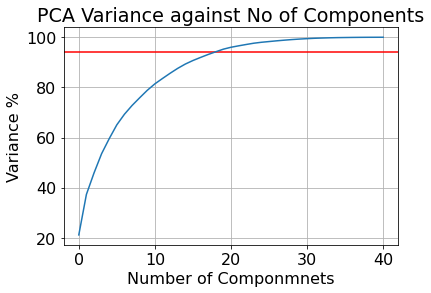

In [107]:
from sklearn.decomposition import PCA

# Dimensionality reduction
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against No of Components")
plt.ylabel("Variance %")
plt.xlabel("Number of Componmnets")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

### 3.1.5 Fit and Transform


In [108]:
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

X_test

array([[ 0.23632353, -0.08823206,  0.37181176, ..., -0.28383704,
         0.05656912,  0.14239038],
       [ 0.29713138, -0.06141492,  0.31993705, ..., -0.28651576,
         0.10513751,  0.14333094],
       [ 0.26519997, -0.22061473,  0.41145611, ..., -0.41733553,
         0.08180435,  0.2146317 ],
       ...,
       [-0.1731606 , -0.14282688,  0.29861474, ..., -0.18212576,
        -0.05025366,  1.22400558],
       [-0.1747144 , -0.16916071,  0.23801861, ..., -0.25437244,
        -0.06077907,  1.32043243],
       [-0.11722154, -0.17367682,  0.26112435, ..., -0.27164939,
        -0.03914555,  1.30079391]])

### 3.1.6  Selecting a Model
In this section I will train two models and check their performance to determine which is the best predictive model for this analysis..

The two modelling algorithms are: 
* Logistic Regression  
* Random Forest.

#### Logistic Regression
Logistic Regression algorithm is a simple algorithm that can be used for binary/multivariate classification tasks. The result of it is a probability that a data point is part of a class.

For this model I have used the binary classification for the activities and I am including the result from the ankle and chest to my features as they show a high correlation to the heartrate and the other features shows no correlation or a negative correlation to the heartrate, hence I wouldn't be using them for developing this model.

In [109]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = df_scaled[['heartrate','ankleAcc16_1','ankleAcc16_2','ankleAcc16_3','ankleAcc6_1','ankleAcc6_2','ankleAcc6_3','chestMagne1','chestMagne2','chestMagne3']] 
y = df_scaled['Active_class']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

# Fit the model 
log_reg.fit(X_train, y_train)

# Predictions 
y_pred = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9262529756160329
Precision: 0.9408417328616248
Recall: 0.9322592557888296
F1 Score: 0.9365308320344187
Confusion Matrix:
[[118798  10635]
 [ 12290 169137]]


#### Random Forest Classifier
Given that the Random Forest technique may be used for classification and regression, it is a very adaptable modelling algorithm. Random Forest, as the name implies, is a forest of trees, decision trees that populate the forest at random. The algorithms generate and integrate decision trees; the more trees in the forest, the more accurate the algorithm's predictions.

Random Forest algorithms are useful because of their high accuracy and flexibility, as they may be used for both classification and regression modelling. Furthermore, Random Forest supports good performance of big dimensionality datasets like ours.

In [115]:
from sklearn.ensemble import RandomForestClassifier
# Define model, fit and predict

rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9972013124879366
Precision: 0.9968574400519541
Recall: 0.9983519542295248
F1 Score: 0.9976041374068505


### 3.1.7 Cross Validation
Cross-validation is a resampling method that tests and trains a model on different iterations using different chunks of the data. When comparing alternative estimator settings, there is a risk of overfitting on the test. The model can "leak" knowledge about the test set, and evaluation metrics no longer report on generalisation performance. To address this issue, a portion of the dataset might be held out as a "validation set": training takes place on the training set, followed by evaluation on the validation set, and when the experiment appears to be successful, final evaluation can take place on the test set.

#### NB:
The computation of the results for the cell below took a long time and hence the output for cross validation wasn't shown, this could be  because the dataset is really large or the computational resources available to my system are limited. Although  the code is functional and can be run by the examiner for verification.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression(solver = 'newton-cg', max_iter=1000, n_jobs=-1, multi_class='multinomial', random_state=0),
               RandomForestClassifier(n_jobs =- 1, random_state = 42)]

score_lst = []
for cls in classifiers:
    # cross validate the accurancy
    acc  = accuracy_score(y_train, cross_val_predict(cls, X_train, y_train, cv = 5))
    # calcuate the error
    scores = cross_val_score(cls, X_train, y_train, scoring = "neg_mean_squared_error",cv= 5)
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test, scoring = "f1_macro", cv = 5)
    
    score_lst.append([cls.__class__.__name__, acc, score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Clasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

### 3.1.8 Interpretating the Metrics of the Models Used
* $1. Accuracy:$
This represents the overall correctness of the model in predicting both classes (active and passive).

* $2. Precision:$ Precision is the ratio of correctly predicted positive observations to the total predicted positives. In the context of activity prediction, it means that when the model predicts an activity as "active," it is correct $94.08%$ and $99.6%$ of the time for both models.

* $3. Recall:$ Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It indicates the model's ability to capture all the relevant instances of the "active" class.

* $4. F1 Score:$ The F1 Score is the weighted average of Precision and Recall, providing a balance between precision and recall.

### 3.2 Conclusion
The result I got from the modelling showed a very high performance of the both model used. The analysis of data from the Colibri Wireless unit using logistic regression and random forest models produced promising findings, indicating the possibility for precise prediction of physical activity types and intensities based on IMU sensor readings and heart rate.

Reliable Predictive Features:
The identified features, including heart rate, acceleration, and magnetic field measurements, proved to be reliable indicators for predicting activity types.

Actionable Insights for Improvement:
The analysis provides actionable insights for potential improvements in both hardware and software aspects of the Colibri Wireless unit. This includes optimizing sensor precision, refining software algorithms, and focusing on key features that contribute most to accurate predictions.

In conclusion, the analysis reveals that the Colibri Wireless unit has the potential to be a market leader in the IMU field. The models serve as a foundation for data-driven improvements, and the user-focused recommendations align with Trivisio's dedication to innovation and quality in motion-sensing technology. Continuous modification and adaption based on user feedback and new technology trends will be critical for preserving and extending the unit's market advantage.

In [2]:
filepath="/Users/ofure/Downloads/DSRM /Dataset/Protocol/277253 DSRM EXAM.ipynb"

import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 3878


#### 3.2.1 REFERENCES
* https://en.wikipedia.org/wiki/Correlation [Accessed 12 Dec. 2023].

* https://en.wikipedia.org/wiki/Logistic_regression [Accessed 20 Dec. 2023].

* https://github.com/andreasKyratzis/PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML/ [Accessed 2 Jan. 2023].

* Data Science Researchh Methods, Lab 2 - 9

* Data Science Research Methods, Lecture slides